# Market Segmentation with Clustering - Lab

## Introduction

In this lab, you'll use your knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

In this lab you will: 

- Use clustering to create and interpret market segmentation on real-world data 

## Getting Started

In this lab, you're going to work with the [Wholesale customers dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) from the UCI Machine Learning datasets repository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from supervised learning and store these labels separately, so that we can use them afterward to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import `pandas`, `numpy`, and `matplotlib.pyplot`, and set the standard alias for each. 
* Use `numpy` to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
import time

Now, let's load our data and inspect it. You'll find the data stored in `'wholesale_customers_data.csv'`. 

In the cell below, load the data into a DataFrame and then display the first five rows to ensure everything loaded correctly.

In [118]:
raw_df = pd.read_csv('wholesale_customers_data.csv')
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [119]:
raw_df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [120]:
raw_df.duplicated().value_counts()

False    440
dtype: int64

In [190]:
channels.value_counts()

1    298
2    142
Name: Channel, dtype: int64

Now, let's go ahead and store the `'Channel'` column in a separate variable and then drop both the `'Channel'` and `'Region'` columns. Then, display the first five rows of the new DataFrame to ensure everything worked correctly. 

In [121]:
channels = raw_df['Channel']
df = raw_df.drop(raw_df.iloc[:, :2], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit it to the data (`df`) 
* Get the predictions from the clustering algorithm and store them in `cluster_preds` 

In [122]:
# import KMeans
from sklearn.cluster import KMeans

In [123]:
k_means = KMeans(n_clusters=2)

#fit KMeans into dataset, df
k_means.fit(df)

cluster_preds = k_means.predict(df)

In [124]:
cluster_preds.shape

(440,)

Now, use some of the metrics to check the performance. You'll use `calinski_harabasz_score()` and `adjusted_rand_score()`, which can both be found inside [`sklearn.metrics`](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

In the cell below, import these scoring functions. 

In [125]:
# import scoring metrics
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

Now, start with CH score to get the variance ratio. 

In [126]:
# CH score
calinski_harabasz_score(df, cluster_preds)

171.68461633384186

Although you don't have any other numbers to compare this to, this is a pretty low score, suggesting that the clusters aren't great. 

Since you actually have ground-truth labels, in this case you can use `adjusted_rand_score()` to check how well the clustering performed. Adjusted Rand score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar the predicted clusters are to the actual channels. 

Adjusted Rand score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score()` and pass in `channels` and `cluster_preds` to see how well your first iteration of clustering performed. 

In [127]:
# adjusted rand score
adjusted_rand_score(channels, cluster_preds)

-0.03060891241109425

According to these results, the clusterings were essentially no better than random chance. Let's see if you can improve this. 

### Scaling our dataset

Recall that k-means clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use `StandardScaler` to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import and instantiate [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and use it to transform the dataset  
* Instantiate and fit k-means to this scaled data, and then use it to predict clusters 
* Calculate the adjusted Rand score for these new predictions 

In [138]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate StandardScaler as scaler
scaler = StandardScaler()

#fit_transform df into scaler
scaled_df = scaler.fit_transform(df)

In [228]:
# fit scaled dataset into KMeans 
k_means_scaled = KMeans(n_clusters=2)
start = time.time()
k_scaled = k_means_scaled.fit(scaled_df)
end = time.time()
print(end-start, 'seconds')
# cluster predictions for scaled data
scaled_preds = k_scaled.predict(scaled_df)

0.05422830581665039 seconds


In [140]:
# CH score for scaled data
calinski_harabasz_score(scaled_df, scaled_preds)

153.5279316041928

In [141]:
# adjusted rand score for scaled data
adjusted_rand_score(channels, scaled_preds)

0.23664708510864038

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the greater the total area that we have to worry about our clusters existing in. Let's try using Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've already seen PCA in a previous section, we will let you figure this out by yourself. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn 
* Create a `PCA` instance and use it to transform our scaled data  
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information 
* Create a new `KMeans` object, fit it to our PCA-transformed data, and check the adjusted Rand score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible adjusted Rand score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [230]:
# import PCA
from sklearn.decomposition import PCA

# Instantiate PCA with default parameters
pca = PCA()

#fit transformer onto pca
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

start = time.time()
pca_k_means = k_means.fit(pca_df)
stop = time.time()
print(stop-start, 'seconds')
pca_preds = pca_k_means.predict(pca_df)
pca_rand = adjusted_rand_score(channels, pca_preds)
pca_rand

0.05596518516540527 seconds


0.212843835451224

In [199]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44082893, 0.72459292, 0.84793705, 0.94189209, 0.98950481,
       1.        ])

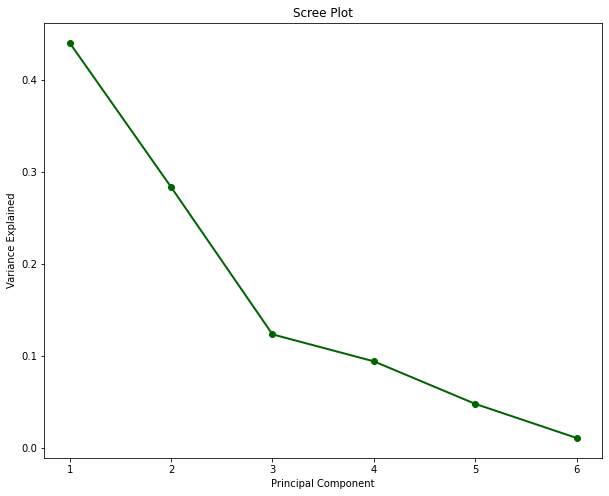

In [218]:
# Let's visualize this in a scree plot, shall we

# define figuresize
plt.rcParams['figure.figsize'] = [10, 8]

# plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', lw=2, color='darkgreen')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained');


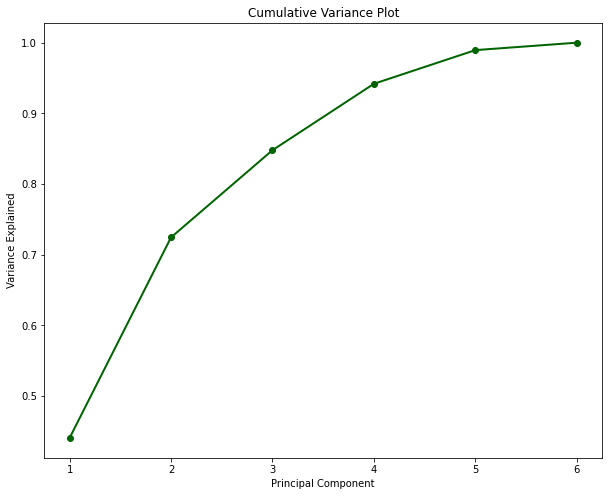

In [220]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', lw=2, color='darkgreen')
plt.title('Cumulative Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained');


In [219]:
"""
4 principal components explain about 94% of variance, which is relatively good.
In the next pca, we will tweak the n_components to 4.

"""

'\n4 principal components explain about 94% of variance, which is relatively good.\nIn the next pca, we will tweak the n_components to 4.\n\n'

In [231]:
# let's use 4 n_components in the second PCA transformation
pca2 = PCA(n_components=4)
k_means_pca = KMeans(n_clusters=2)

# transform scaled_df
pca2_df = pca2.fit_transform(scaled_df)

# fit model on pca2_df
start = time.time()
pca2_k_means = k_means_pca.fit(pca2_df)
end = time.time()
print(end-start, 'seconds')

#cluster predcitions 
pca2_preds = k_means_pca.predict(pca2_df)

#adjusted rand score
pca_rand_2 = adjusted_rand_score(channels, pca2_preds)
pca_rand_2

0.04795551300048828 seconds


0.13885372763476506

In [250]:
# let's use 4 n_components in the second PCA transformation
pca2 = PCA(n_components=4)

#KMeans with 3 clusters
k_means_pca1 = KMeans(n_clusters=3)

# transform scaled_df
pca3_df = pca3.fit_transform(scaled_df)

# fit model on pca2_df
start = time.time()
pca3_k_means = k_means_pca1.fit(pca3_df)
end = time.time()
print(end-start, 'seconds')

#cluster predcitions 
pca3_preds = k_means_pca1.predict(pca3_df)

#adjusted rand score
pca_rand_3 = adjusted_rand_score(channels, pca3_preds)
pca_rand_3

0.06414937973022461 seconds


0.23556718912952324

In [152]:
calinski_harabasz_score(pca2_df, pca_preds)

166.62002495745313

In [232]:
"""The highest adjusted rand score is 0.23664708510864038 obtained after data was scaled.
Shows that the clusters formed may not have been the best possible clusters (adjusted Rand Index of 1)
but they are better than adjusted rand index of <=0. This implies that our clusters are better than if they were randomly selected. 
PCA reduced data dimensionality improving model performance i.e saving on time
but did not improve adjusted rand score"""

'The highest adjusted rand score is 0.23664708510864038 obtained after data was scaled.\nShows that the clusters formed may not have been the best possible clusters (adjusted Rand Index of 1)\nbut they are better than adjusted rand index of <=0. This implies that our clusters are better than if they were randomly selected. \nPCA reduced data dimensionality improving model performance i.e saving on time\nbut did not improve adjusted rand score'

**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many principal components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_________________________________________________________________________________________
The highest adjusted rand score is 0.23664708510864038 obtained after data was scaled.
Shows that the clusters formed may not have been the best possible clusters (adjusted Rand Index of 1)
but they are better than adjusted rand index of <=0. This implies that our clusters are better than if they were randomly selected. 
PCA reduced data dimensionality improving model performance i.e saving on time
but did not improve adjusted rand score____________________________________

## Optional (Level up) 

### Hierarchical Agglomerative Clustering

Now that we've tried doing market segmentation with k-means clustering, let's end this lab by trying with HAC!

In the cells below, use [Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to make cluster predictions on the datasets we've created and see how HAC's performance compares to k-mean's performance. 

**_NOTE_**: Don't just try HAC on the PCA-transformed dataset -- also compare algorithm performance on the scaled and unscaled datasets, as well! 

In [161]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate HAC with deafault parameters
HAC = AgglomerativeClustering()

#fit unscaled data
HAC.fit(df)
HAC_preds = HAC.fit_predict(df)

# adjusted rand score for unscaled data
HAC_rand = adjusted_rand_score(channels, HAC_preds)
HAC_rand

-0.01923156414375716

In [225]:
"""This is an obvious bad score. For starters, it is negative meaning it is less than what is expected from a random result"""

'This is an obvious bad score. For starters, it is negative meaning it is less than what is expected from a random result'

In [162]:
#adjusted rand score for scaled dataframe
HAC_rand2 = adjusted_rand_score(channels, HAC.fit_predict(scaled_df))
HAC_rand2

0.022565317001188977

In [222]:
"""Better score from previous one. Needs a bit of tweaking"""

'Better score from previous one. Needs a bit of tweaking'

In [165]:
HAC_rand_PC = adjusted_rand_score(channels, HAC.fit_predict(pca2_df))
HAC_rand_PC

0.04822381910875346

In [233]:
"""
Dimensionality reduction with Pricipal Component Analysis to the save
Much Better result, but still too low
"""


'\nDimensionality reduction with Pricipal Component Analysis to the save\nMuch Better result, but still too low\n'

In [246]:
# increasing n_clusters
HAC2 = AgglomerativeClustering(n_clusters=3)
HAC2.fit(pca2_df)
HAC2_score = adjusted_rand_score(channels, HAC2.fit_predict(pca2_df))
HAC2_score

0.5264329416047491

In [251]:
"""Increasing n_clusters has certainly improve the adjusted rand score. We might need to analyze the data in relation
to the channel variable further """

'Increasing n_clusters has certainly improve the adjusted rand score. We might need to analyze the data in relation\nto the channel variable further '

In [248]:
HAC2.fit(scaled_df)
adjusted_rand_score(channels, HAC2.fit_predict(scaled_df))

0.4856417426338801

In [252]:
"""so far, dimensionality reduction and increasing clusters to 3 have improved our Hierarchical Clustering Algorithm"""

'so far, dimensionality reduction and increasing clusters to 3 have improved our Hierarchical Clustering Algorithm'

## Summary

In this lab, you used your knowledge of clustering to perform a market segmentation on a real-world dataset. You started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!